In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

from keijzer_exogan import *

%matplotlib inline
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"} # Make sure the axis background of plots is white, this is usefull for the black theme in JupyterLab
sns.set()

In [2]:
dir = 'F:\\Jupyterlab\\DCGAN\\data\\ExoGAN\\'

X = load_all_to_array(dir)

np.random.seed(23) # Set seed for the np.random functions

# Shuffle X along the first axis to make the order of simulations random
np.random.shuffle(X) # note that X = np.rand.... isn't required

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]c:\program files\python36\lib\site-packages\tqdm\_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:17<00:00, 17.79s/it]


In [3]:
# Select a sample
x = X[20000]
x.keys()

dict_keys(['data', 'param'])

In [4]:
x['data'].keys(), x['param'].keys()

(dict_keys(['spectrum']),
 dict_keys(['planet_mass', 'temperature_profile', 'ch4_mixratio', 'planet_radius', 'h2o_mixratio', 'co2_mixratio', 'co_mixratio']))

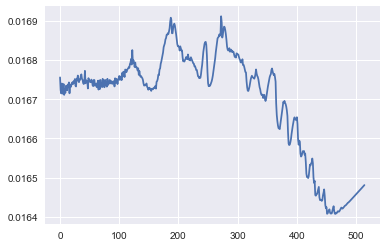

In [26]:
"""
Lets ignore the params for now and work with the spectrum
"""

spectrum = x['data']['spectrum']
plt.plot(spectrum)

In [27]:
len(spectrum) # spectrum consists of 515 datapoints (this seems to be the case for all samples)

515

In [28]:
"""
TODO: Convert this spectrum to a 23x23 image
23x23 = 529 bins
If all spectra consist of 515 bins then resampling is not required.


Approach:
From one sample, scale the complete spectrum to 0-1. 
Save the standard score Z of that spectrum. 
(Somehow encode Z to the yet to be produced image.)
Reshape spectrum to a 23x23 matrix (has 529 entries), fill NaNs with zeros.

"""


'\nTODO: Convert this spectrum to a 23x23 image\n23x23 = 529 bins\nIf all spectra consist of 515 bins then resampling is not required.\n\n\nApproach:\nFrom one sample, scale the complete spectrum to 0-1. \nSave the standard score Z of that spectrum. \n(Somehow encode Z to the yet to be produced image.)\nReshape spectrum to a 23x23 matrix (has 529 entries), fill NaNs with zeros.\n\n'

In [29]:
spectrum.shape

(515,)

In [30]:
spectrum = spectrum.reshape(-1, 1) # convert 1D array to 2D cause standardscaler requires it
spectrum.shape

(515, 1)

# Scaling the spectrum

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler = MinMaxScaler(feature_range=(0,1)).fit(spectrum)
std = np.std(spectrum)
min_ = spectrum.min()
max_ = spectrum.max()
print("std: %.5f \t min: %.5f \t max: %.5f " % (std, min_, max_))

std: 0.00014 	 min: 0.01641 	 max: 0.01691 


std, min, max values have to be stored (and scaled) in the image also. 
In Order to scale it efficiently, a good 'sample' of the complete distribution of the training data has to be gathered.
That way a fixed value for the scaling of this data can be received.

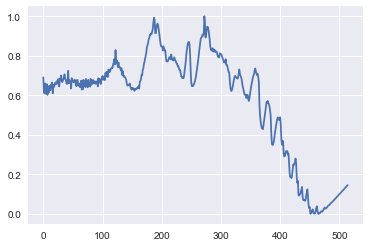

In [33]:
spectrum = scaler.transform(spectrum)
plt.plot(spectrum)

# Transforming into an image

In [34]:
# Reshape to 23x23 array (23x23 has 529)
# So first, make the length of the spectrum 529 and fill NaNs with zeros
# Assuming all arrays are length 515

spectrum = np.append(spectrum, [0 for _ in range(14)]) # fill array to size 529 with zeroes
spectrum[-50:] # display last 50 results, to make sure it went well

array([0.03357882, 0.03726252, 0.04105104, 0.04272869, 0.04509577,
       0.04871322, 0.05275635, 0.05600151, 0.0578264 , 0.06066391,
       0.06369849, 0.06712662, 0.07070797, 0.07382668, 0.07668811,
       0.07992249, 0.08327303, 0.0865099 , 0.08969258, 0.09285716,
       0.09602815, 0.09936424, 0.10257045, 0.10585365, 0.1091335 ,
       0.1124386 , 0.1157626 , 0.1190922 , 0.12242704, 0.12576723,
       0.12911287, 0.13246407, 0.13582094, 0.1391836 , 0.14255214,
       0.1459267 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [35]:
spectrum.shape

(529,)

In [36]:
# time to reshape
spectrum = spectrum.reshape(23, 23)
spectrum.shape

(23, 23)

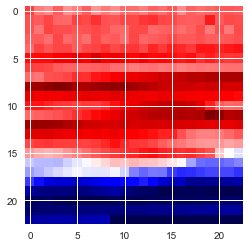

In [37]:
cmap = 'seismic'

plt.imshow(spectrum, cmap=cmap)

# Add the different building blocks

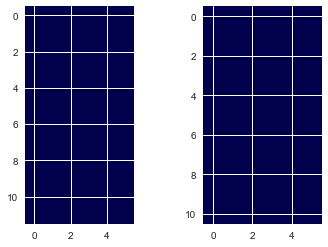

In [38]:
# Creating sections for the ASPA, like section 2 - 12 from within the paper

max1 = np.full((12,6), max_) # create array of shape 12,7 (height, width) with the max_ value
min1 = np.full((11,6), min_)

plt.subplot(1,2, 1)
plt.imshow(max1, cmap=cmap)

plt.subplot(1,2, 2)
plt.imshow(min1, cmap=cmap)

# Note that the colours are the same because cmap gets scaled the the values inside the respective array

## Combine the three arrays into one (wide) image

In [39]:
max1min1 = np.concatenate((max1, min1), axis=0) # axis 0 adds min1 below max1
max1min1.shape

(23, 6)

## Add this max_ min_ info to the image

(23, 29)

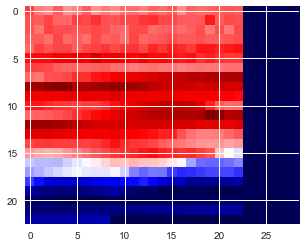

In [40]:
image = np.concatenate((spectrum, max1min1), axis=1)
plt.imshow(image, cmap=cmap)
image.shape

## Do the same with the other building blocks



In [41]:
x['param']

{'ch4_mixratio': 0.016681005372000592,
 'co2_mixratio': 0.0004641588833612782,
 'co_mixratio': 2.1544346900318865e-06,
 'h2o_mixratio': 0.1,
 'planet_mass': 3.5429333333333333e+27,
 'planet_radius': 88553933.33333333,
 'temperature_profile': 1666.6666666666667}

In [42]:


# Get the param values
ch4 = x['param']['ch4_mixratio']
co2 = x['param']['co2_mixratio']
co = x['param']['co_mixratio']
h2o = x['param']['h2o_mixratio']
mass = x['param']['planet_mass']
radius = x['param']['planet_radius']
temp = x['param']['temperature_profile']

# scale the data
def scale_param(X, X_min, X_max):
    """
    Formule source: 
    https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
    """
    std = (X-X_min)/ (X_max - X_min)
    return std*(1 - 0)+0

In [43]:
ch4 = scale_param(ch4, 1e-8, 1e-1)
co2 = scale_param(co2, 1e-8, 1e-1)
co = scale_param(co, 1e-8, 1e-1)
h2o = scale_param(h2o, 1e-8, 1e-1)
mass = scale_param(mass, 1.5e27, 3.8e27)
radius = scale_param(radius, 5.6e7, 1.0e8)
temp = scale_param(temp, 1e3, 2e3)

In [44]:
print('ch4: ', ch4)
print('co2: ', co2)
print('co: ', co)
print('h2o: ', h2o)
print('mass: ', mass)
print('radius: ', radius)
print('temp: ', temp)

ch4:  0.16680997040100293
co2:  0.0046414892977617115
co:  2.1444349044753766e-05
h2o:  1.0
mass:  0.8882318840579709
radius:  0.7398621212121211
temp:  0.6666666666666667


In [47]:
# Create the building blocks
co2 = np.full((23,1), co2)
co = np.full((23,1), co)
ch4 = np.full((23,1), ch4)


mass = np.full((1,23), mass)
radius = np.full((1,23), radius)
temp = np.full((1,23), temp)

h2o = np.full((9,9), h2o)

max2 = np.full((6,12), max_) # create array of shape 12,7 (height, width) with the max_ value
min2 = np.full((6,11), min_)

(23, 32)

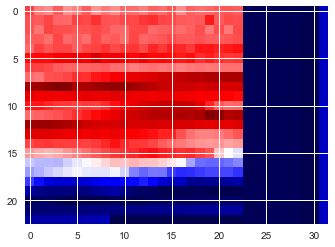

In [48]:
image = np.concatenate((image, co2), axis=1)
image = np.concatenate((image, co), axis=1)
image = np.concatenate((image, ch4), axis=1)
plt.imshow(image, cmap=cmap)
image.shape

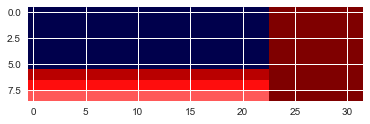

In [49]:
# Create the 4, 5, 9, 10, 11, 12 section (in order)
sub_image = np.concatenate((max2, min2), axis=1)
sub_image = np.concatenate((sub_image, mass), axis=0)
sub_image = np.concatenate((sub_image, radius), axis=0)
sub_image = np.concatenate((sub_image, temp), axis=0)
sub_image = np.concatenate((sub_image, h2o), axis=1)

plt.imshow(sub_image, cmap=cmap)

In [50]:
image = np.concatenate((image, sub_image), axis=0)

(32, 32)

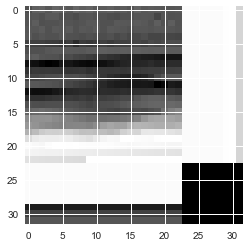

In [51]:
plt.imshow(image, cmap='binary')
image.shape

In [52]:
image

array([[6.90555104e-01, 6.26204715e-01, 6.09724825e-01, ...,
        4.64148930e-03, 2.14443490e-05, 1.66809970e-01],
       [6.71352897e-01, 6.62379931e-01, 6.82325500e-01, ...,
        4.64148930e-03, 2.14443490e-05, 1.66809970e-01],
       [6.69627782e-01, 6.34576865e-01, 6.86833830e-01, ...,
        4.64148930e-03, 2.14443490e-05, 1.66809970e-01],
       ...,
       [8.88231884e-01, 8.88231884e-01, 8.88231884e-01, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [7.39862121e-01, 7.39862121e-01, 7.39862121e-01, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [6.66666667e-01, 6.66666667e-01, 6.66666667e-01, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]])